In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [5]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [7]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [8]:
df_airline.dropna(axis=0,inplace=True)

In [9]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [10]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [11]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [12]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [13]:
df_airline.set_index('Month',inplace=True)

In [14]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

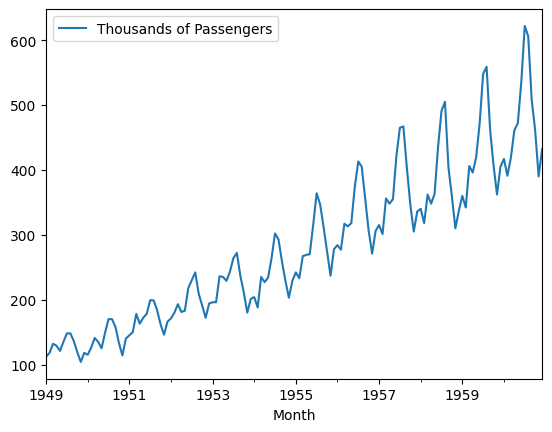

In [15]:
df_airline.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060482
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [20]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [21]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699994
p- value: 0.0542132902838255
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [22]:
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [23]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468505
p- value: 2.7328918500142407e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [24]:
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [25]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514954
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

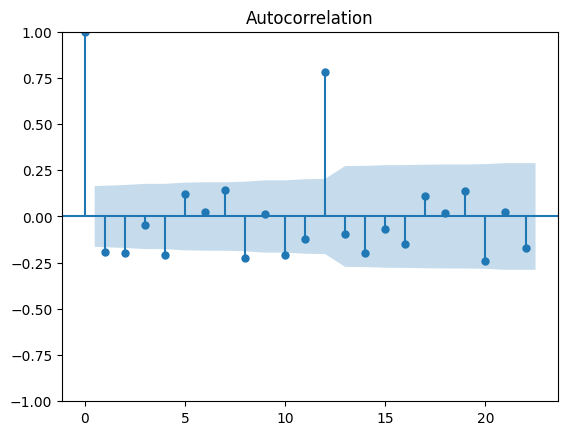

In [27]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

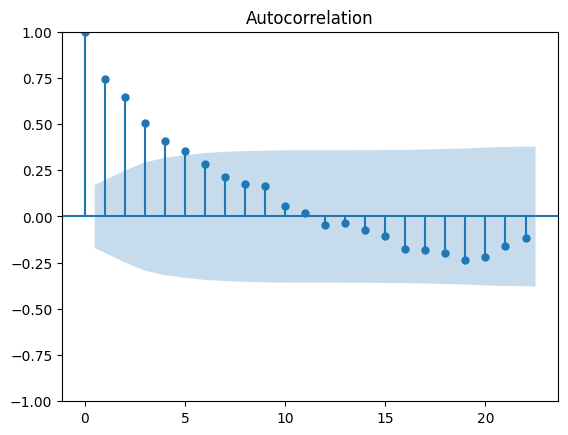

In [28]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
